<a href="https://colab.research.google.com/github/rjm135/SISR/blob/main/EDSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/SR-Model')

In [ ]:
!cd EDSR_Tensorflow-master && unzip dataset-final-e.zip 

Archive:  dataset-final-e.zip
  inflating: test/1.png              
  inflating: test/10.png             
  inflating: test/100.png            
  inflating: test/101.png            
  inflating: test/102.png            
  inflating: test/103.png            
  inflating: test/104.png            
  inflating: test/105.png            
  inflating: test/106.png            
  inflating: test/107.png            
  inflating: test/108.png            
  inflating: test/109.png            
  inflating: test/11.png             
  inflating: test/110.png            
  inflating: test/111.png            
  inflating: test/112.png            
  inflating: test/113.png            
  inflating: test/114.png            
  inflating: test/115.png            
  inflating: test/116.png            
  inflating: test/117.png            
  inflating: test/118.png            
  inflating: test/119.png            
  inflating: test/12.png             
  inflating: test/120.png            
  inflating: test/13

In [1]:
%tensorflow_version 1.x
import tensorflow as tensorflow

tensorflow.__version__

TensorFlow 1.x selected.


'1.15.2'

In [ ]:
import pathlib
import os
from PIL import Image
import numpy as np
import cv2
import tensorflow as tf
import random

def getpaths(path):
    """
    Get all image paths from folder 'path' while avoiding ._ files.
    """
    im_paths = []
    for fil in os.listdir(path):
            if '.png' in fil:
                if "._" in fil:
                    #avoid dot underscore
                    pass
                else:
                    im_paths.append(os.path.join(path, fil))
    return im_paths

def calcmean(imageFolder, bgr):
    """
    Calculates the mean of a dataset.
    """
    paths = getpaths(imageFolder)

    total_mean = [0, 0, 0]
    im_counter = 0

    for p in paths:

        image = np.asarray(Image.open(p))

        mean_rgb = np.mean(image, axis=(0, 1), dtype=np.float64)

        if im_counter % 50 == 0:
            print("Total mean: {} | current mean: {}".format(total_mean, mean_rgb))

        total_mean += mean_rgb
        im_counter += 1

    total_mean /= im_counter

    # rgb to bgr
    if bgr is True:
        total_mean = total_mean[...,::-1]

    return total_mean

In [ ]:
calcmean(imageFolder='/content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/train', bgr=True)

Total mean: [0, 0, 0] | current mean: [140.77250797 140.77250797 140.77250797]
Total mean: [5748.00961709 5748.00961709 5748.00961709] | current mean: [83.96624004 83.96624004 83.96624004]
Total mean: [10953.14591807 10953.14591807 10953.14591807] | current mean: [150.44824992 150.44824992 150.44824992]
Total mean: [16559.31302177 16559.31302177 16559.31302177] | current mean: [79.32950447 79.32950447 79.32950447]
Total mean: [21497.87701553 21497.87701553 21497.87701553] | current mean: [145.46122416 145.46122416 145.46122416]
Total mean: [26768.129439 26768.129439 26768.129439] | current mean: [83.95651647 83.95651647 83.95651647]
Total mean: [31865.52679824 31865.52679824 31865.52679824] | current mean: [81.00222734 81.00222734 81.00222734]
Total mean: [36771.63207376 36771.63207376 36771.63207376] | current mean: [76.60229597 76.60229597 76.60229597]
Total mean: [41817.28653173 41817.28653173 41817.28653173] | current mean: [63.51370047 63.51370047 63.51370047]
Total mean: [47210.5

array([108.53441393, 108.53441393, 108.53441393])

In [ ]:
calcmean(imageFolder='/content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/val', bgr=True)

Total mean: [0, 0, 0] | current mean: 47.50917320942157
Total mean: [2538.47007691 2538.47007691 2538.47007691] | current mean: 40.217913795866046
Total mean: [4969.57911392 4969.57911392 4969.57911392] | current mean: 35.70269187630188


array([48.96649192, 48.96649192, 48.96649192])

In [ ]:
calcmean(imageFolder='/content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/test', bgr=True)

Total mean: [0, 0, 0] | current mean: 84.21004066312167
Total mean: [3729.19606923 3729.19606923 3729.19606923] | current mean: 77.84542800542175
Total mean: [7438.32321969 7438.32321969 7438.32321969] | current mean: 77.55265352935044


array([75.97000052, 75.97000052, 75.97000052])

In [ ]:
import os
os.chdir('/content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master')

In [ ]:
%run -i main.py --train --fromscratch --scale 2 --traindir /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/train --validdir /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/val

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.


Running EDSR.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
No checkpoint loaded. Training from scratch.
Training...
Step nr: [500/?] - Loss: 4.53204 - Lr: 0.0001000
Step nr: [1000/?] - L

Loading pb...
149.26003 146.46558607
PSNR of  EDSR   upscaled image: 39.31329360676648
PSNR of bicubic upscaled image: 39.099165158334344


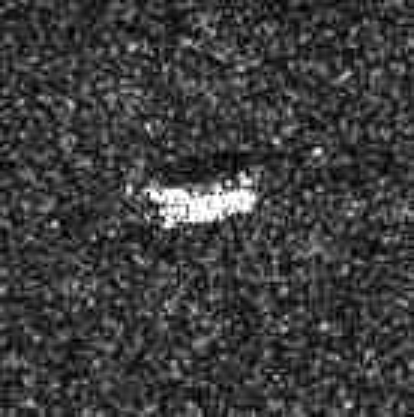

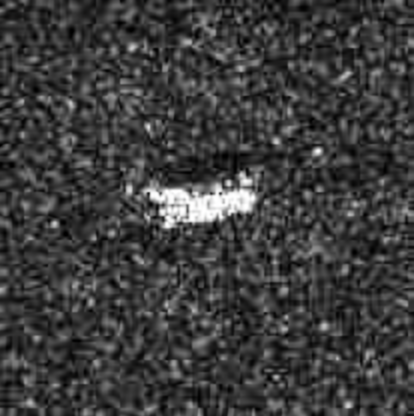

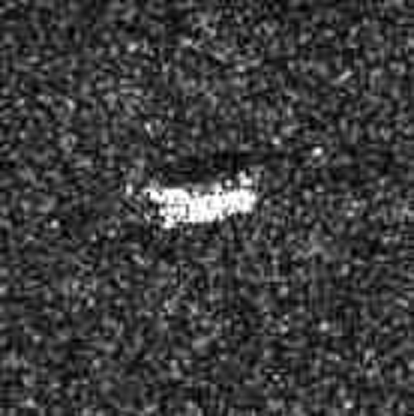

Done.
I ran successfully.


In [61]:
%run -i main.py --test --scale 2 --image /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/test/10.png

In [ ]:
%run -i main.py --train --scale 3 --traindir /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/train --validdir /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/val

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.


Running EDSR.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Restoring parameters from ./CKPT_dir/x3/edsr_ckpt

Loaded checkpoint.
Training...
Step nr: [500/?] - Loss: 0.98

Loading pb...
161.30717 146.46558607
PSNR of  EDSR   upscaled image: 31.237765021796918
PSNR of bicubic upscaled image: 31.330007510019847


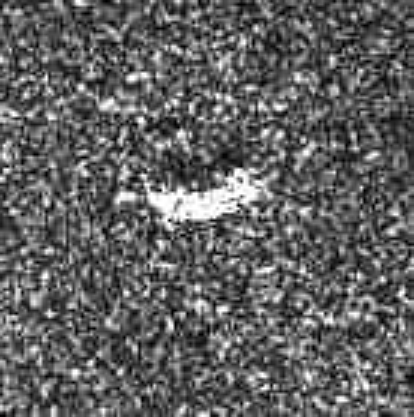

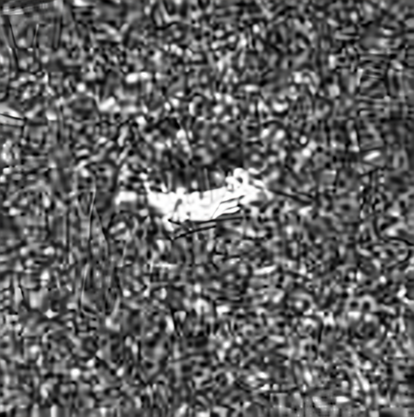

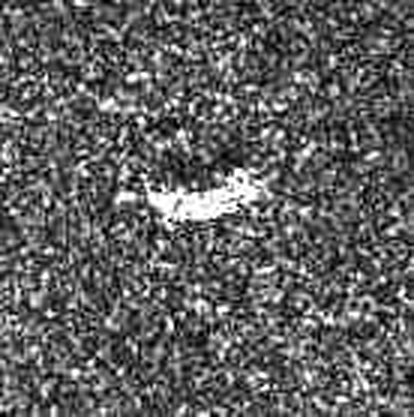

Done.
I ran successfully.


In [79]:
%run -i main.py --test --scale 3 --image /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/test/9.png

In [ ]:
%run -i main.py --train --scale 4 --traindir /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/train --validdir /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/val

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.


Running EDSR.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Restoring parameters from ./CKPT_dir/x4/edsr_ckpt

Loaded checkpoint.
Training...
Step nr: [300/?] - Loss: 9.07

Loading pb...
148.99902 146.46558607
PSNR of  EDSR   upscaled image: 33.1323778510261
PSNR of bicubic upscaled image: 33.251234328316336


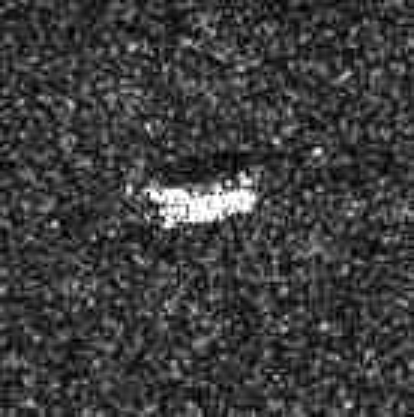

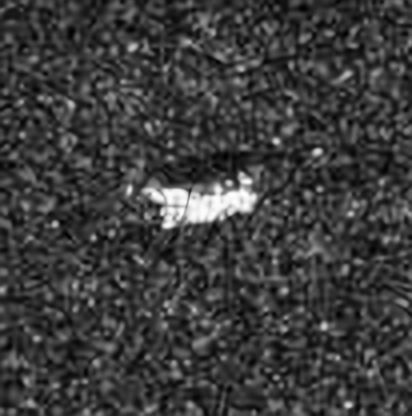

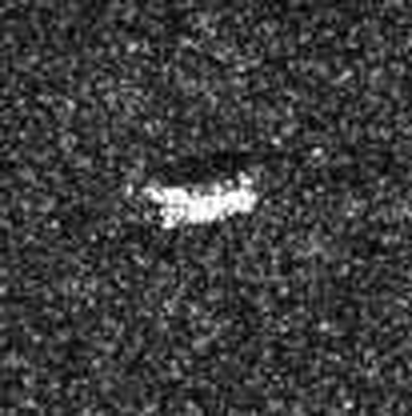

Done.
I ran successfully.


In [99]:
%run -i main.py --test --scale 4 --image /content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/test/10.png

In [3]:
import os
os.chdir('/content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master')

In [100]:
from skimage.measure import compare_ssim
#import argparse
#import imutils
import cv2

img1="/content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/images/original.png"
img2="/content/drive/MyDrive/SR-Model/EDSR/EDSR_Tensorflow-master/images/EdsrOutput.png"


# load the two input images
imageA = cv2.imread(img1)
imageB = cv2.imread(img2)

print(imageA.shape)
print(imageB.shape)

imageB=cv2.resize(imageB, dsize=(414, 417))

print(imageB.shape)


# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)



# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

(417, 414, 3)
(416, 412, 3)
(417, 414, 3)
SSIM: 0.8214272067176909


main.py:30: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  parser.add_argument('--F', type=int, help='Number of filters', default=256)
